In [1]:
import pandas as pd
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
################### reading files ####################
my_example_nc_file = 'EUREC4A_HALO_BAHAMAS-Radiometer_20200209a.nc'
fh = Dataset(my_example_nc_file, mode='r')
df_fdir = pd.read_csv('BBR_DirectFraction_Flight_20200209a_R0.dat',skiprows = 34,delim_whitespace=True)
df_fdw = pd.read_csv('BBR_Fdn_clear_sky_Flight_20200209a_R0.dat',skiprows = 34, delim_whitespace=True)
#nav = pd.read_csv('Nav_IMS0000_02022020.Asc',skiprows=14, header=None,delim_whitespace=True)
fdw_time = df_fdw.loc[:,['sod','F_dw']]
fdir_time = df_fdir.loc[:,'f_dir']
db = pd.concat([fdw_time,fdir_time],axis=1)
db.set_index('sod',inplace=True)
time = fh.variables['TIME'][:] # time
time_bac = pd.DataFrame(time.T, columns = ['time'])
time_bac = time_bac/1000
db,time_bac

(             F_dw     f_dir
 sod                        
 38599   92.918152  0.857430
 38719  106.475372  0.868896
 38839  120.822342  0.878977
 38959  135.832779  0.887887
 39079  151.390778  0.895643
 ...           ...       ...
 64783  834.626709  0.875275
 64904  818.838013  0.866361
 65025  803.384766  0.857069
 65145  798.682190  0.856559
 65265  793.910522  0.855981
 
 [223 rows x 2 columns],            time
 0       33272.0
 1       33272.1
 2       33272.2
 3       33272.3
 4       33272.4
 ...         ...
 317095  64981.5
 317096  64981.6
 317097  64981.7
 317098  64981.8
 317099  64981.9
 
 [317100 rows x 1 columns])

In [2]:
array = np.arange(38599,64982, 1)
arr = array.repeat(10)
df_arr = pd.DataFrame(arr, columns = ['time_arr'])
df_arr.set_index('time_arr',inplace=True)
data = df_arr.join(db)
data_int= data.interpolate(method='linear', limit_direction='forward', axis=0)
#data_int.drop(data_int.index[0:12089],inplace=True)
data_int.reset_index(inplace=True)
data_int['time']=data_int.loc[:,'index']
data_int.drop('index',axis=1)
#data_int[data_int.time==66083]
#df_r = data_int.iloc[0:274510,:]
#df_r

,F_dw,f_dir,time
0,92.918152,0.857430,38599
1,92.918152,0.857430,38599
2,92.918152,0.857430,38599
3,92.918152,0.857430,38599
4,92.918152,0.857430,38599
...,...,...,...
263825,818.838013,0.866361,64981
263826,818.838013,0.866361,64981
263827,818.838013,0.866361,64981
263828,818.838013,0.866361,64981


In [3]:
#317100  - 263830 
x = data_int.iloc[0:1,:]
df_exp = pd.concat([x]*53270, ignore_index=True)
df1 = pd.concat([df_exp,data_int],axis=0)
df1.reset_index(inplace=True,drop=True)
df1.drop('index',axis=1)

,F_dw,f_dir,time
0,92.918152,0.857430,38599
1,92.918152,0.857430,38599
2,92.918152,0.857430,38599
3,92.918152,0.857430,38599
4,92.918152,0.857430,38599
...,...,...,...
317095,818.838013,0.866361,64981
317096,818.838013,0.866361,64981
317097,818.838013,0.866361,64981
317098,818.838013,0.866361,64981


In [4]:
fdw = df1.loc[:,'F_dw']
fdir = df1.loc[:,'f_dir']
szai = fh.variables['SUN_ALT'][:] # solar altitude angle
sza = pd.DataFrame(szai.T)
sza.columns=['SUN_ALT']
saai = fh.variables['SUN_AZI'][:] # solar azimuth angle
saa = pd.DataFrame(saai.T)
saa.columns=['SUN_AZI']
SWd = fh.variables['FDSC'][:]
SWD = pd.DataFrame(SWd.T)
SWD.columns=['shortwave_down']
SWu = fh.variables['FUS'][:]
LWu = fh.variables['FDL'][:]
LWd = fh.variables['FUL'][:]
SWU = pd.DataFrame(SWu.T)
SWU.columns=['ShortWave_up']
LWU = pd.DataFrame(LWu.T)
LWU.columns=['LongWave_down']
LWD = pd.DataFrame(LWd.T)
LWD.columns=['LongWave_up']
radiometer_nc= pd.concat([time_bac,SWD,SWU,LWU,LWD,saa,sza,fdw,fdir],axis=1)
d = radiometer_nc.loc[:,'time'].astype(str).str.split('.')
dec = []
for b,n in d:
    dec.append(b)
decend = pd.DataFrame(dec)
decend.columns=['Time']
df2=pd.concat([decend,radiometer_nc],axis=1)
df2.drop(['time'],axis=1,inplace=True)
df2

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir
0,33272,-2.547593,-2.494278,383.304810,448.125061,101.290764,-17.486540,92.918152,0.857430
1,33272,-1.962626,-2.697029,387.720581,448.532562,101.290840,-17.486076,92.918152,0.857430
2,33272,-2.471302,-3.030818,382.340942,448.951233,101.290916,-17.485615,92.918152,0.857430
3,33272,-1.484560,-1.911089,386.633209,448.367462,101.290985,-17.485153,92.918152,0.857430
4,33272,-1.601727,-0.918667,387.778839,447.889709,101.291061,-17.484690,92.918152,0.857430
...,...,...,...,...,...,...,...,...,...
317095,64981,277.664154,14.482124,430.574554,549.925293,-134.662064,51.614105,818.838013,0.866361
317096,64981,276.346252,13.706730,425.540833,549.821533,-134.661560,51.613773,818.838013,0.866361
317097,64981,276.801575,13.296893,431.537201,549.529236,-134.661072,51.613441,818.838013,0.866361
317098,64981,276.675781,13.238617,442.624023,549.819153,-134.660568,51.613113,818.838013,0.866361


In [5]:
ri = fh.variables['IRS_PHI'][:] # roll angle "deg"
ro = pd.DataFrame(ri.T,columns=['roll'])
pi = fh.variables['IRS_THE'][:] # pitch angle "deg"
po = pd.DataFrame(pi.T,columns=['pitch'])
yi = fh.variables['IRS_HDG'][:] # yaw angle "deg"
y = pd.DataFrame(yi.T,columns=['yaw'])
df_big = pd.concat([df2,ro,po,y],axis=1)
df_big

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw
0,33272,-2.547593,-2.494278,383.304810,448.125061,101.290764,-17.486540,92.918152,0.857430,1.202962,6.381219,76.552254
1,33272,-1.962626,-2.697029,387.720581,448.532562,101.290840,-17.486076,92.918152,0.857430,1.238816,6.668253,76.584366
2,33272,-2.471302,-3.030818,382.340942,448.951233,101.290916,-17.485615,92.918152,0.857430,1.248174,6.927238,76.606087
3,33272,-1.484560,-1.911089,386.633209,448.367462,101.290985,-17.485153,92.918152,0.857430,1.192639,7.170630,76.634277
4,33272,-1.601727,-0.918667,387.778839,447.889709,101.291061,-17.484690,92.918152,0.857430,1.126338,7.405077,76.659248
...,...,...,...,...,...,...,...,...,...,...,...,...
317095,64981,277.664154,14.482124,430.574554,549.925293,-134.662064,51.614105,818.838013,0.866361,0.495478,-0.331174,75.897835
317096,64981,276.346252,13.706730,425.540833,549.821533,-134.661560,51.613773,818.838013,0.866361,0.639795,-0.591525,75.885170
317097,64981,276.801575,13.296893,431.537201,549.529236,-134.661072,51.613441,818.838013,0.866361,0.693415,-0.865792,75.854294
317098,64981,276.675781,13.238617,442.624023,549.819153,-134.660568,51.613113,818.838013,0.866361,0.683619,-1.112558,75.823982


In [6]:
import math
r_off =  0.3
p_off =  -2.33
i1=[]
i2=[]
j1=[]
j2=[]
k1=[]
k2=[]
l1=[]
l2=[]

for i in df_big.SUN_ALT:
    i1.append(math.sin((90-i)*(math.pi/180)))
    i2.append(math.cos((90-i)*(math.pi/180)))
for k in df_big.roll:
    k=k+r_off
    k1.append(math.sin(k*(math.pi/180)))
    k2.append(math.cos(k*(math.pi/180)))
diff = df_big.SUN_AZI-df_big.yaw
for j in diff:
    j1.append(math.sin(j*(math.pi/180)))
    j2.append(math.cos(j*(math.pi/180)))
for l in df_big.pitch:
    l=l+p_off
    l1.append(math.sin(l*(math.pi/180)))
    l2.append(math.cos(l*(math.pi/180)))
       
eq1 = i1
eq2 = [i2[i]*k1[i]*j1[i] for i in range(len(i2))]
eq3 = [i2[i]*l1[i] for i in range(len(i2))]
eq4 = [k2[i]*j2[i] for i in range(len(k2))]
eq5 = [i1[i]*l2[i]*k2[i] for i in range(len(i1))]
factor = [eq1[i]/(eq2[i]+(eq3[i]*eq4[i])+eq5[i]) for i in range(len(eq1))]
x = df_big.F_dw
y = df_big.f_dir
Fdw = [y[i]*x[i]*factor[i]+(1-y[i])*x[i] for i in range(len(i1))]

swd_correct = pd.DataFrame(Fdw)
swd_correct.columns = ['shortwave_down_corrected']
df_big['shortwave_down_corrected']=swd_correct
df_bigg = df_big.groupby('Time').mean()
df_bigg.reset_index(inplace=True)
df_bigg.to_csv('df_bigg_9feb.csv')

In [7]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(64981)

[18, 3, 1]

In [8]:
import datetime
start = datetime.datetime(2020, 2, 9, 9, 14, 32)
end = datetime.datetime(2020, 2, 9, 18, 3, 1)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_bigg['time']=df_time_delta
df_bigg

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw,shortwave_down_corrected,time
0,33272,-1.859943,-2.046810,387.703918,447.921753,101.291100,-17.484459,92.918152,0.857430,0.929365,7.411974,76.643288,95.586995,2020-02-09 09:14:32
1,33273,-2.225768,-1.886138,388.051788,445.959137,101.291855,-17.479832,92.918152,0.857430,-0.652715,8.773068,76.558838,96.034426,2020-02-09 09:14:33
2,33274,-1.782458,-2.748600,390.180267,444.816132,101.292610,-17.475195,92.918152,0.857430,-0.399738,9.427452,76.403854,96.473735,2020-02-09 09:14:34
3,33275,-2.042734,-2.719955,387.043152,442.373047,101.293358,-17.470554,92.918152,0.857430,-1.284368,9.538163,76.378494,96.377618,2020-02-09 09:14:35
4,33276,-2.365000,-2.264247,387.736328,442.483826,101.294113,-17.465908,92.918152,0.857430,-2.662264,10.204944,76.189911,96.567528,2020-02-09 09:14:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31705,64977,308.171234,20.476402,433.272644,542.869812,-134.682312,51.627590,818.838013,0.866361,1.780656,2.032471,76.429039,799.140497,2020-02-09 18:02:57
31706,64978,295.812683,21.010225,434.999451,544.365173,-134.677307,51.624252,818.838013,0.866361,0.691848,1.845332,75.949448,804.834611,2020-02-09 18:02:58
31707,64979,287.461731,23.152187,434.611877,544.511963,-134.672302,51.620918,818.838013,0.866361,-0.564302,2.315384,75.484848,820.869089,2020-02-09 18:02:59
31708,64980,281.996552,21.219391,435.394043,545.627136,-134.667297,51.617592,818.838013,0.866361,0.932289,1.535947,75.729210,799.377180,2020-02-09 18:03:00


C:\Users\spark.DESKTOP-D1NJRMK\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


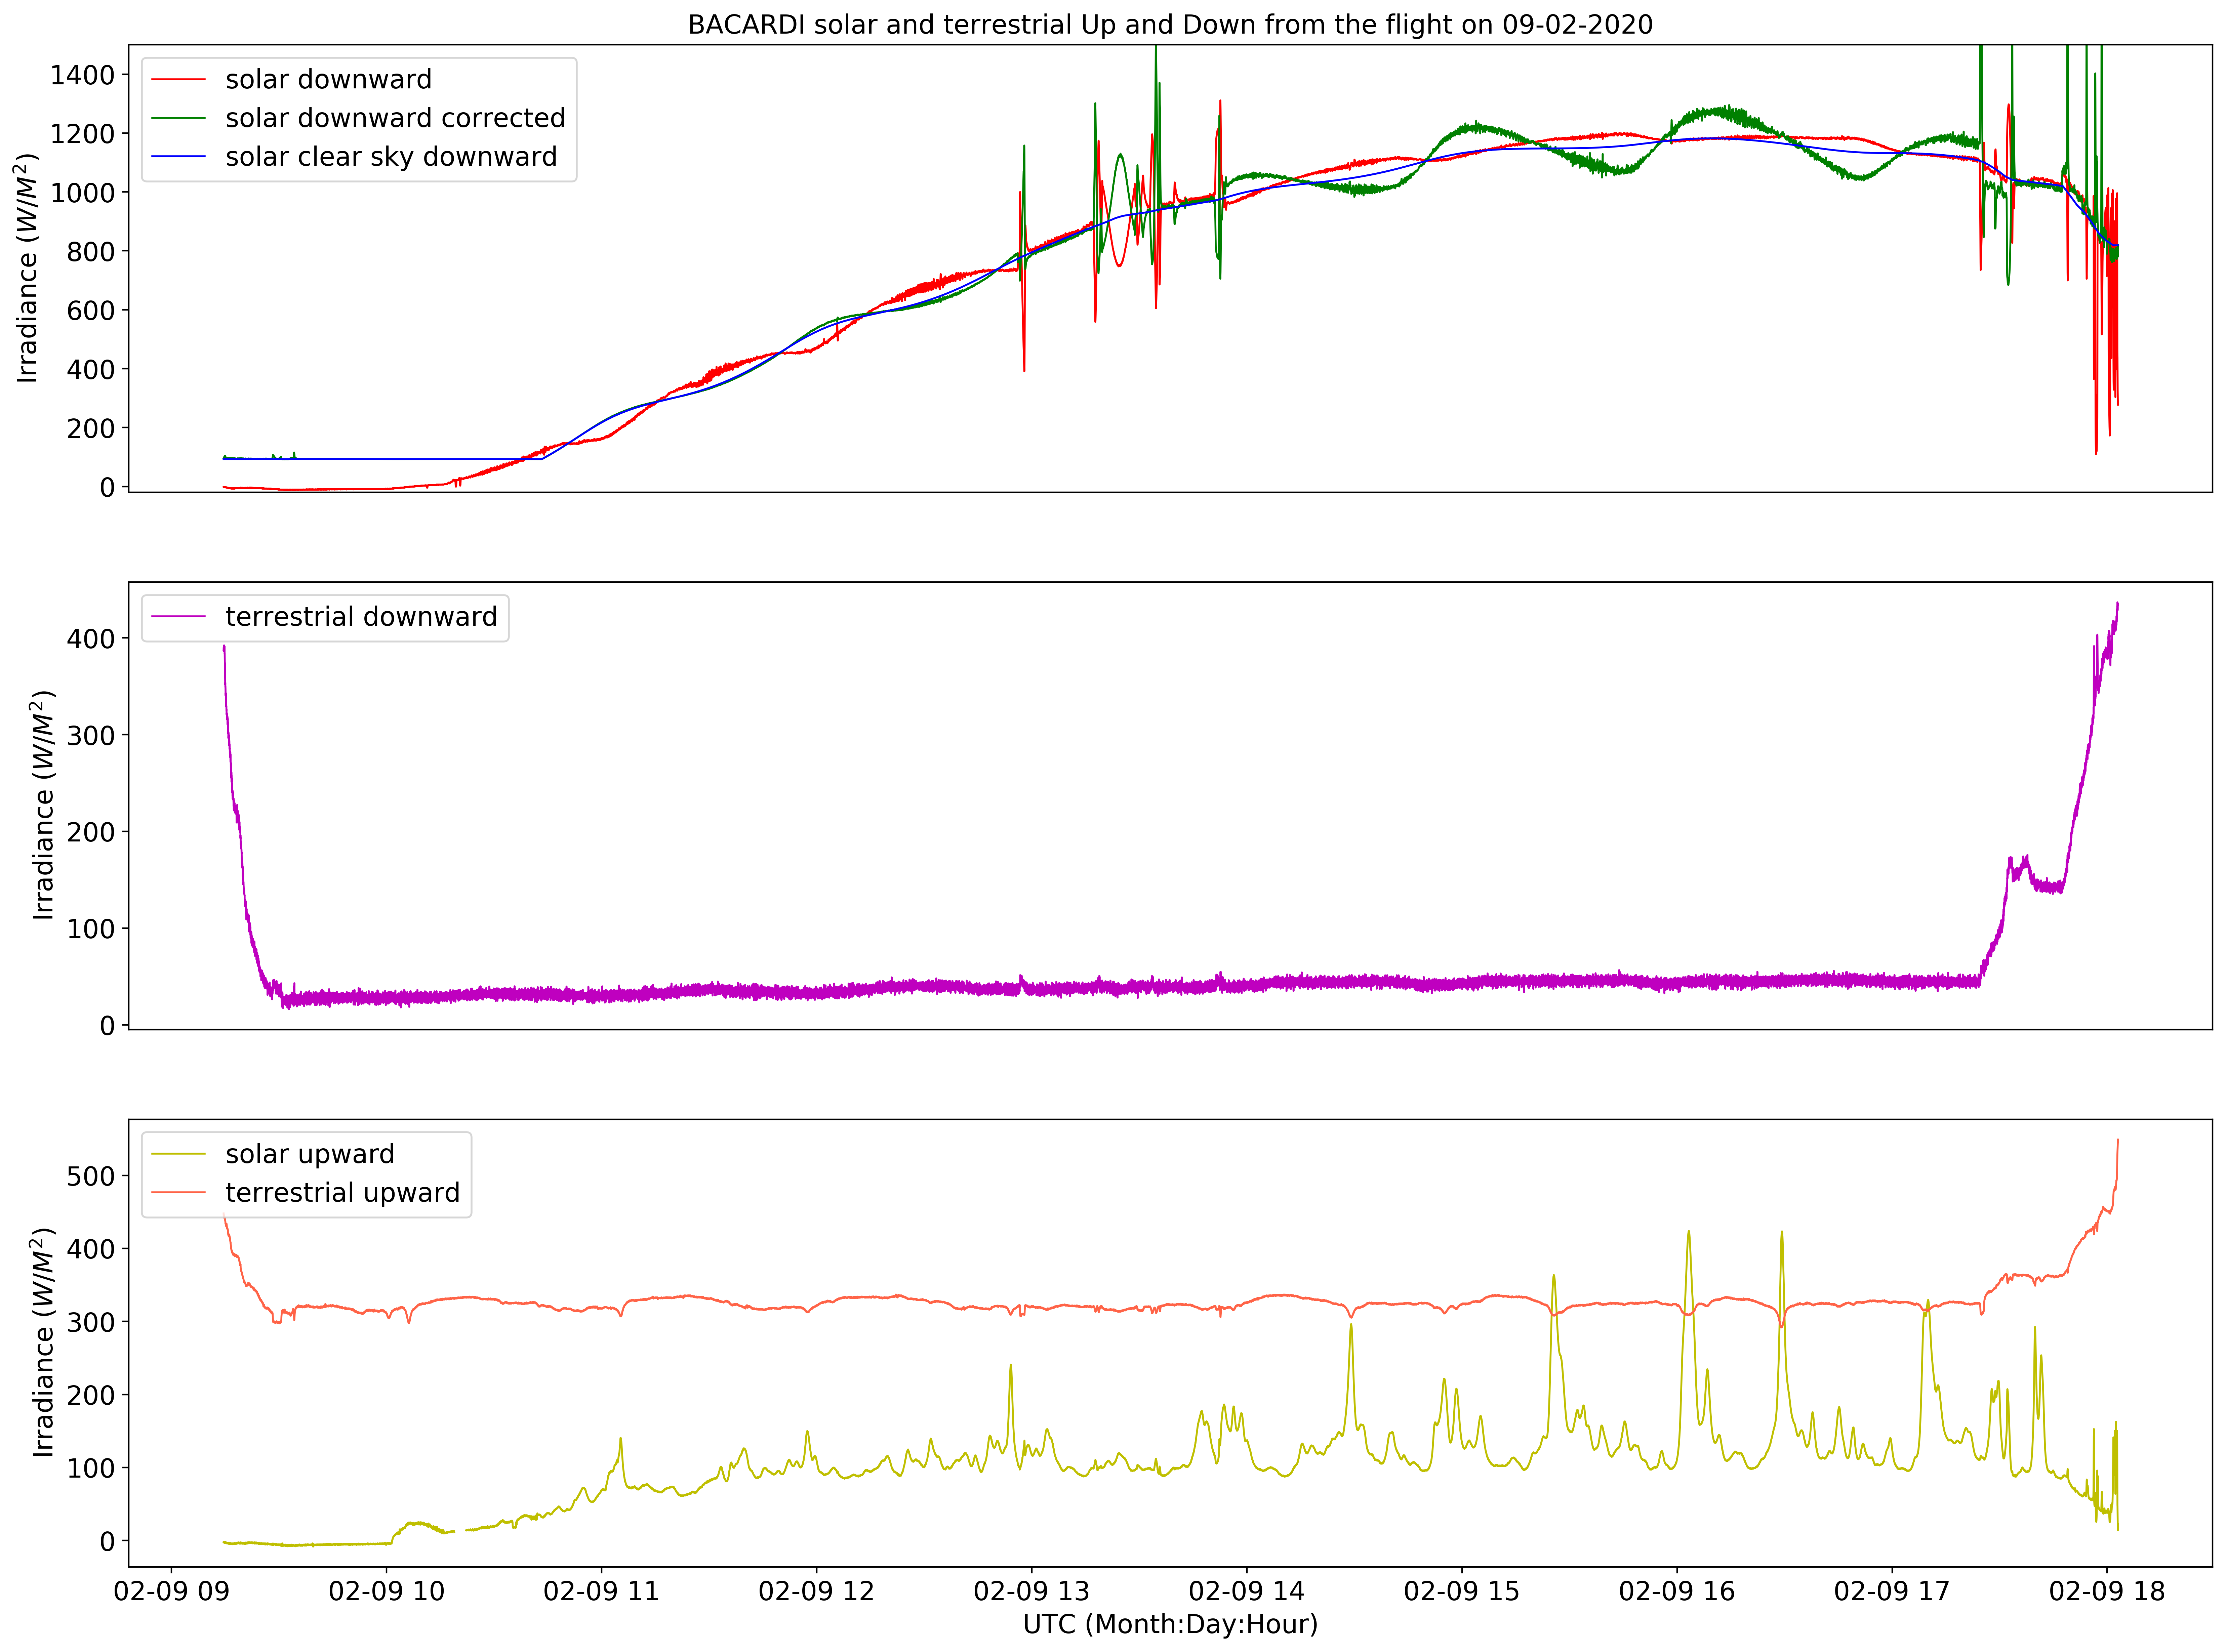

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
#df_new_24jan = pd.read_csv('df_new_24jan.csv')
plt.figure(figsize=(20,15),dpi=400)
plt.subplot(311)
plt.plot(df_bigg.time,df_bigg.shortwave_down, 'r', label = 'solar downward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.shortwave_down_corrected, 'g', label = 'solar downward corrected',linewidth=1)
plt.plot(df_bigg.time,df_bigg.F_dw, 'b', label = 'solar clear sky downward',linewidth=1)
plt.title('BACARDI solar and terrestrial Up and Down from the flight on 09-02-2020',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.ylim(-20,1500)
plt.subplot(312)
plt.plot(df_bigg.time,df_bigg.LongWave_down, 'm', label = 'terrestrial downward',linewidth=1)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(313)
plt.plot(df_bigg.time,df_bigg.ShortWave_up, 'y', label = 'solar upward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.LongWave_up, 'tomato', label = 'terrestrial upward',linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xlabel('UTC (Month:Day:Hour)',fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.show()